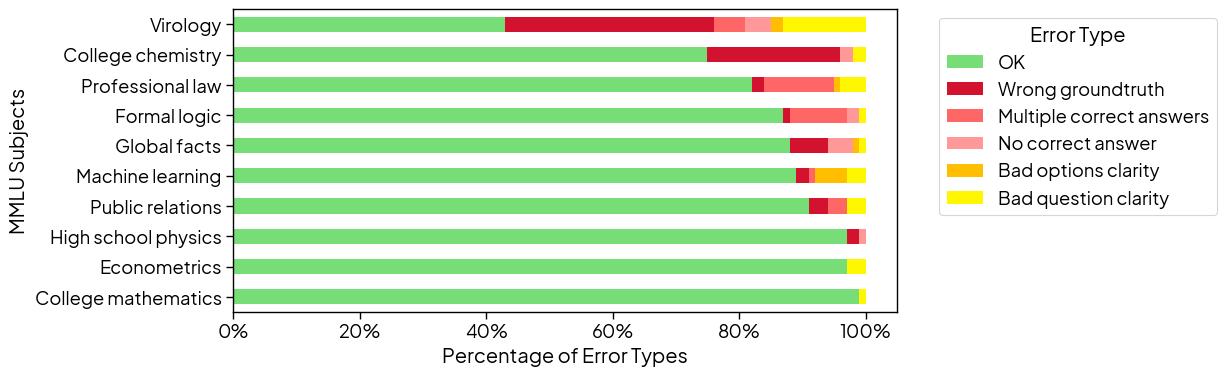

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt
from matplotlib import font_manager

# Add the font to Matplotlib's font manager
font_manager.fontManager.addfont("/Library/Fonts/PlusJakartaSans-Regular.ttf")

# Set the font globally for all text elements
plt.rcParams['font.family'] = 'Plus Jakarta Sans'


def error_type_capitalize(error_type):
    if error_type.lower() == "ok":
        return "OK"
    else:
        return error_type.replace("_", " ").capitalize()


configs = [
    "college_chemistry",
    "econometrics",
    "formal_logic",
    "global_facts",
    "high_school_physics",
    "public_relations",
    "virology",
    "college_mathematics",
    "machine_learning",
    "professional_law"
]

# Set a general style
# plt.style.use('whitegrid')
sns.set_context("paper", font_scale=1.5)  # Adjust font scale for better readability


# Create a vertically long figure to fit a single column
fig, ax = plt.subplots(figsize=(15, 4))  # Adjust the figure size as needed

# Initialize a DataFrame to store all data
all_data = pd.DataFrame()

for config in configs:
    # Load the dataset
    dataset = load_dataset("edinburgh-dawg/mini-mmlu", config)
    
    # Extract the error types from the test set
    error_types = [row["error_type"] for row in dataset["test"]]
    
    # Create a DataFrame and add a column for the configuration
    df = pd.DataFrame(error_types, columns=['Error Type'])
    df["Error Type"] = df["Error Type"].apply(error_type_capitalize)
    df['Config'] = config.replace("_", " ").capitalize()
    
    # Append to the main DataFrame
    all_data = pd.concat([all_data, df], ignore_index=True)

# Pivot the data to get counts of each error type per configuration
data_pivot = all_data.pivot_table(index='Config', columns='Error Type', aggfunc=len, fill_value=0)

# Define the desired order of columns
columns_order = ['OK', 'Wrong groundtruth', 'Multiple correct answers', 'No correct answer', 'Bad options clarity', 'Bad question clarity']

# Reorder the columns according to the specified order
data_pivot = data_pivot[columns_order]

# Sort data by the count of "OK" error type in ascending order
data_pivot = data_pivot.sort_values(by="OK", ascending=False)

# Normalize the data by row to get percentages
data_normalized = data_pivot.div(data_pivot.sum(axis=1), axis=0)

# Define a custom color map
colors = ['#77dd77', '#d2122e', '#ff6666', '#ff9999', '#ffbf00', '#fff700']  # Adjust these colors as needed
color_map = ListedColormap([colors[columns_order.index(et)] for et in columns_order])

# Plot the stacked bar chart using the custom color map
data_normalized.plot(kind='barh', stacked=True, ax=ax, legend=True, colormap=color_map)
ax.set_xlabel('Percentage of Error Types')
ax.set_ylabel('MMLU Subjects')
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))  # Format the x-axis labels as percentages

# Move the legend outside of the plot
ax.legend(title='Error Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0,0,0.85,1])

plt.savefig('mini-mmlu-stats.pdf', format='pdf', bbox_inches='tight')

# Show the plots
plt.show()